In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import xlsxwriter
import os

In [5]:
df = pd.read_excel("AirBnB.xlsx")

In [49]:
# Groups
average_price_in_each_neighbourhood_group = df.groupby('neighbourhood_group').agg(Average_Price=('price', 'mean')).sort_values(by='Average_Price', ascending=False)
average_price_in_each_neighbourhood = df.groupby('neighbourhood').agg(Average_Price=('price', 'mean')).sort_values(by='Average_Price', ascending=False)
average_price_of_each_room_type = df.groupby('room_type').agg(Average_Price=('price', 'mean')).sort_values(by='Average_Price', ascending=False)

average_min_nights = df.groupby('neighbourhood').agg(Average_Nights=('minimum_nights', 'mean')).sort_values(by='Average_Nights', ascending=False)
total_reviews_in_each_neighbourhood_group = df.groupby('neighbourhood_group').agg(Total_Reviews=('number_of_reviews', 'sum')).sort_values(by='Total_Reviews', ascending=False)
total_reviews_in_each_neighbourhood = df.groupby('neighbourhood').agg(Total_Reviews=('number_of_reviews', 'sum')).sort_values(by='Total_Reviews', ascending=False)
average_reviews_per_month_in_each_neighbourhood_group = df.groupby('neighbourhood_group').agg(Avg_Reviews_per_Month=('reviews_per_month', 'mean')).sort_values(by='Avg_Reviews_per_Month', ascending=False)
average_reviews_per_month_in_each_neighbourhood = df.groupby('neighbourhood').agg(Avg_Reviews_per_Month=('reviews_per_month', 'mean')).sort_values(by='Avg_Reviews_per_Month', ascending=False)

In [ ]:
# Joins
neighbourhood_group_review = average_price_in_each_neighbourhood_group.join(total_reviews_in_each_neighbourhood_group).join(average_reviews_per_month_in_each_neighbourhood_group)
neighbourhood_review = average_price_in_each_neighbourhood.join(total_reviews_in_each_neighbourhood).join(average_reviews_per_month_in_each_neighbourhood).join(average_min_nights)

In [83]:
# Pivot Tables
price_breakdown_by_neighbourhood_pivot = df.pivot_table(values='price', index='neighbourhood', columns='neighbourhood_group', aggfunc='mean', fill_value=0)
average_price_per_unit_pivot = df.pivot_table(values='price', index='neighbourhood_group', columns='room_type', aggfunc='mean')

In [97]:
os.makedirs('AirBnB')

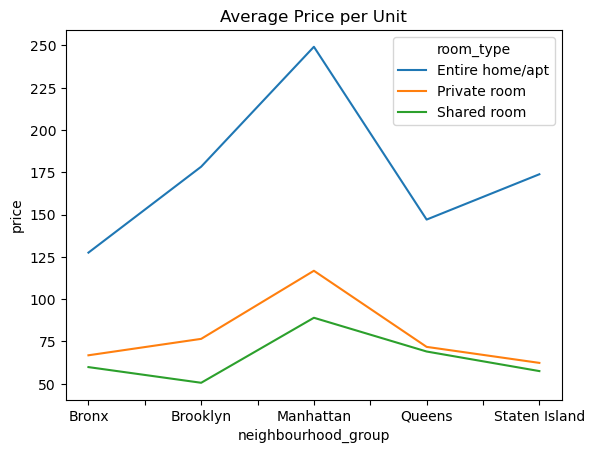

In [105]:
ax = average_price_per_unit_pivot.plot()
ax.set_title("Average Price per Unit")
ax.set_ylabel("price")

plt.savefig(r"AirBnB\average_price_per_unit.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

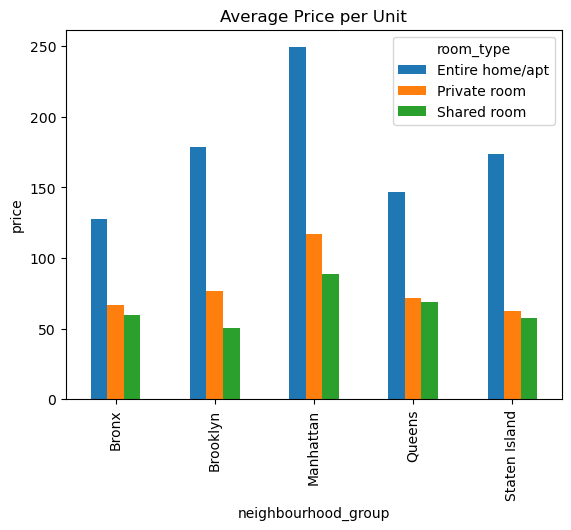

In [107]:
ax = average_price_per_unit_pivot.plot(kind='bar')
ax.set_title("Average Price per Unit")
ax.set_ylabel("price")

plt.savefig(r"AirBnB\average_price_per_unit_bar.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

In [111]:
with pd.ExcelWriter(r"AirBnB\air_bnb_review.xlsx", engine="xlsxwriter") as writer:
    neighbourhood_group_review.to_excel(writer, sheet_name="Neighbourhood Groups")
    neighbourhood_review.to_excel(writer, sheet_name="Neighbourhoods")
    price_breakdown_by_neighbourhood_pivot.to_excel(writer, sheet_name="Price by Neighbourhood")
    average_price_per_unit_pivot.to_excel(writer, sheet_name="Price per Unit")
    
    workbook = writer.book
    worksheet = workbook.add_worksheet("Charts")

    worksheet.insert_image("B2", r"AirBnB\average_price_per_unit.png")
    worksheet.insert_image("B25", r"AirBnB\average_price_per_unit_bar.png")

    writer._save()

C:\Users\Bruce\anaconda3\Lib\site-packages\xlsxwriter\workbook.py:377: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")
